# Logistic Regression

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Simple Logistic Regression

$ P(y=1 \mid x) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n)}} $

where:

* $ P(y=1 \mid x) $ — **predicted probability** that the outcome $ y $ equals 1 given input features $ x $;
* $ w_0 $ — **bias** (intercept term);
* $ w_i $ — **model coefficients** showing the influence of feature $ x_i $;
* $ e $ — base of the natural logarithm (≈ 2.718);
* the denominator $ 1 + e^{-z} $ represents the **sigmoid function**, which maps any real number into the range [0, 1].

### Limitations

* Assumes a **linear relationship** between features and the log-odds of the target.
* Performs poorly with **nonlinear** or **highly correlated** features.
* Sensitive to **outliers** and **unscaled data**.
* Requires a meaningful **correlation** between input features and the target variable.
* Works best with up to **1,000–10,000 features** and around **5,000–100,000 samples**.

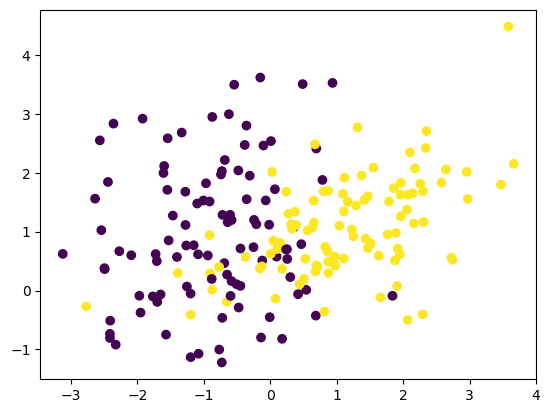

In [2]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 87.5%
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.77      1.00      0.87        17

    accuracy                           0.88        40
   macro avg       0.89      0.89      0.87        40
weighted avg       0.90      0.88      0.88        40



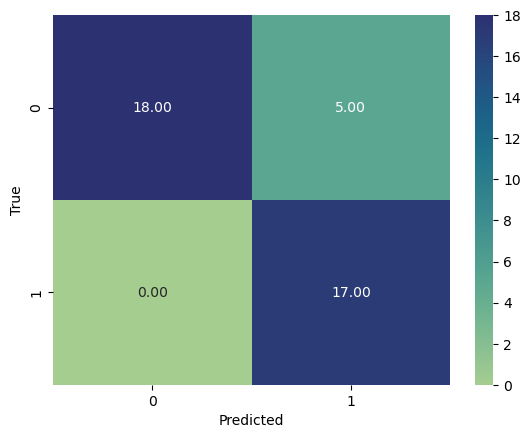

In [6]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="crest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression on the Two Moons Dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

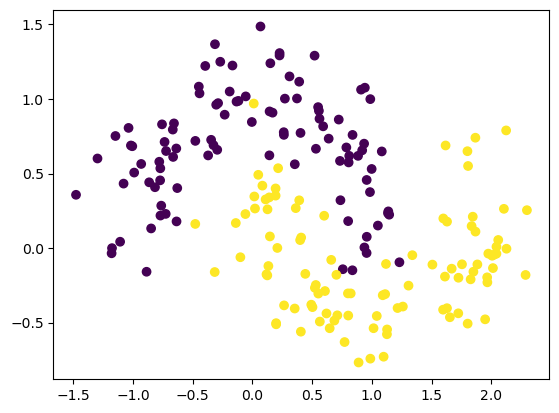

In [8]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
model = LogisticRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [11]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 92.5%
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.89      0.94      0.92        18

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



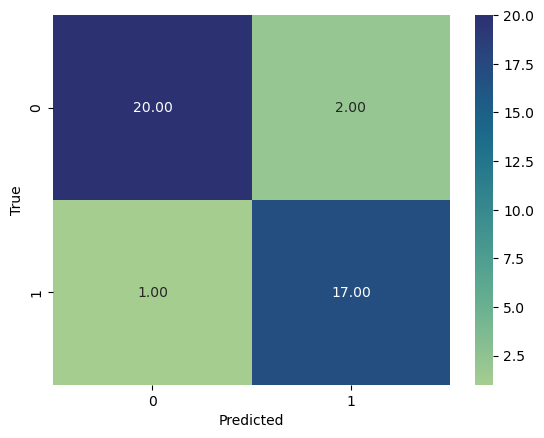

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="crest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()